# Analyzing World Happiness

In the code below, we import the standard data analysis libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, we use `pd.read_csv()` to read our csv files into a dataframe object. 

Afterwards, we rename the columns into a more user-friendly format.

In [2]:
happiness2016 = pd.read_csv('WH2016.csv')
happiness2022 = pd.read_csv('2022.csv')
happiness2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


# Cleaning the Data

Let's check the dataframe for missing values. It's important to always check for missing values before you begin aggregating and visualizing the data. Otherwise, your code could raise an error message.

In [3]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [4]:
happiness2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
column_list = happiness2016.columns
for column in column_list:
    print(happiness2016[column].value_counts())

Country
Denmark       1
Albania       1
Laos          1
Nigeria       1
Honduras      1
             ..
Kazakhstan    1
Moldova       1
Russia        1
Poland        1
Burundi       1
Name: count, Length: 157, dtype: int64
Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64
Happiness Rank
57     2
34     2
145    2
1      1
108    1
      ..
54     1
55     1
56     1
59     1
157    1
Name: count, Length: 154, dtype: int64
Happiness Score
5.835    2
6.379    2
3.739    2
7.526    1
4.754    1
        ..
5.919    1
5.897    1
5.856    1
5.822    1
2.905    1
Name: count, Length: 154, dtype: int64
Lower Confidence Interval
3.621    

All of the columns appear to be uniform, and our investigations did not reveal any values that could throw off calculations.

# Reshaping the Dataframe

The columns have rather long names, so we'll rename them to make the dataframe more readable.

In [6]:
happiness2016 = happiness2016.rename(columns={'Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'})
happiness2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


## Reshaping the Dataframe with `pd.melt()`

Our dataframe has a large number of columns, which means this dataframe has 'wide-format data'. We'll reshape the dataframe to 'long-format' so that it is more readable and easier to work with. 

To reshape the dataframe, we'll be using `pd.melt()`. But before we do that, we'll create two different lists to make the code more readable.

In [7]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factor_cols = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

Now that we've created our lists, we can go ahead and use `pd.melt()`

`pd.melt()` converts a dataframe from a "wide format" to a "long format" by "melting" the data. Here is a breakdown of `pd.melt()`:

* **Unpivots a dataframe**: It takes wide-format data where each row has multiple columns of potentially related information (factors) and it turns it into long-format data where each row represents a single observation.
<br>
* **Identifiers and Variables**: You can specify one or more columns as identifier variables (id_vars), which are kept fixed. The remaining columns are considered measured variables (value_vars) and are unpivoted to the row axis, leaving just two non_identifier columns: `variable` and `value`
<br>

* **Customization**: You can customize the names of the variable and value columns with the `var_name` and `value_name` parameters, respectively.

In [8]:
melt = pd.melt(happiness2016, id_vars=main_cols, value_vars=factor_cols, var_name='Happiness Factor', value_name='Impact')
melt['Percentage'] = round(melt['Impact']/melt['Happiness Score'] * 100,2)
melt

,Country,Region,Happiness Rank,Happiness Score,Happiness Factor,Impact,Percentage
0,Denmark,Western Europe,1,7.526,Economy,1.44178,19.16
1,Switzerland,Western Europe,2,7.509,Economy,1.52733,20.34
2,Iceland,Western Europe,3,7.501,Economy,1.42666,19.02
3,Norway,Western Europe,4,7.498,Economy,1.57744,21.04
4,Finland,Western Europe,5,7.413,Economy,1.40598,18.97
...,...,...,...,...,...,...,...
1094,Benin,Sub-Saharan Africa,153,3.484,Dystopia Residual,2.10812,60.51
1095,Afghanistan,Southern Asia,154,3.360,Dystopia Residual,2.14558,63.86
1096,Togo,Sub-Saharan Africa,155,3.303,Dystopia Residual,2.13540,64.65
1097,Syria,Middle East and Northern Africa,156,3.069,Dystopia Residual,0.81789,26.65


Bravo! This new 'melted' dataframe has 'long-format data'. This will make it easier to use the `dataframe.pivot_table`() method.

Now that we've created our new dataframe, we'll use `dataframe.pivot_table()` to aggregate the data, here's a breakdown of how the method works:

* **Aggregates Data**: It aggregates data based on the values of one or more keys. You can specify the aggregation function (e.g., mean, sum) using the `aggfunc` parameter. By default, this method will find the mean of the values.
<br>

* **Customizable**: You can customize the rows (`index`) to group by, the columns(`columns`) to group by, and values to aggregate(`values`). It also allows you to fill missing values with a specified value (`fill_value`).
<br>

In [9]:
melt_pt = melt.pivot_table(index='Happiness Factor',values='Impact')

In [10]:
melt_pt

,Impact
Happiness Factor,
Dystopia Residual,2.325807
Economy,0.953880
Family,0.793621
Freedom,0.370994
Generosity,0.242635
Health,0.557619
Trust,0.137624


To verify that this method is properly aggregating the mean value of each happiness factor, let's go ahead and calculate it again, using a different process.

In [11]:
round(happiness2016['Economy'].mean(),5)

0.95388

In [12]:
round(happiness2016['Family'].mean(),5)

0.79362

The mean for `Economy` and `Family` factors are the same as the aggregated means from our pivot table. Mission success!

# End of Project Visualization

Now that we have a 'tidy' dataframe with two columns, we can create a beautiful pie chart!

We'll use the `dataframe.plot()` method, while setting the `kind` parameter to `'pie'` and setting the `y` values to the `"Impact"` column from the melt dataframe.

<Axes: title={'center': 'Happiness Factors - Average Impact on Total Happiness'}>

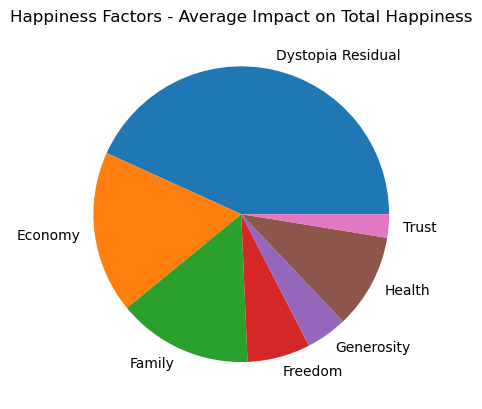

In [13]:
melt_pt.plot(kind='pie', y='Impact', legend=False, ylabel='', title='Happiness Factors - Average Impact on Total Happiness')

In [14]:
happiness2016.nlargest(15,'Family')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
48,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
18,Ireland,Western Europe,19,6.907,6.836,6.978,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
36,Spain,Western Europe,37,6.361,6.288,6.434,1.34253,1.12945,0.87896,0.37545,0.06137,0.17665,2.39663
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
69,Paraguay,Latin America and Caribbean,70,5.538,5.453,5.623,0.89373,1.11111,0.58295,0.46235,0.07396,0.25296,2.16091


In [15]:
happiness2016.nlargest(15,'Happiness Score')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [16]:
happiness2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [17]:
happiness2022['Happiness score'] = happiness2022['Happiness score'].str.replace(',','')

In [18]:
happiness2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7821,"7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,7636,"7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,7557,"7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,7512,"7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,7415,"7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3268,"3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,2995,"3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,2955,"3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,2404,"2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


In [19]:
happiness2022.dropna()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7821,"7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,7636,"7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,7557,"7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,7512,"7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,7415,"7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3471,"3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,143,Rwanda*,3268,"3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,2995,"3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,2955,"3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [20]:
happiness2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [23]:
happiness2022['Happiness score'] = happiness2022['Happiness score'].astype(float)

In [24]:
happiness2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    object 
 4   Whisker-low                                 146 non-null    object 
 5   Dystopia (1.83) + residual                  146 non-null    object 
 6   Explained by: GDP per capita                146 non-null    object 
 7   Explained by: Social support                146 non-null    object 
 8   Explained by: Healthy life expectancy       146 non-null    object 
 9   Explained by: Freedom to make life choices  146 non-null    object 
 10  Explained by: 

In [26]:
happiness2022.nlargest(30,'Happiness score')

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7821.0,"7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,7636.0,"7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,7557.0,"7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,7512.0,"7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,7415.0,"7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,7404.0,"7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,7384.0,"7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,7365.0,"7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,7364.0,"7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,7200.0,"7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [30]:
happiness2023 = pd.read_csv('/Users/reese/Data Science Projects/World Happiness Project/WHR_2023.csv')

In [31]:
happiness2023

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [32]:
happiness2023.nlargest(30,'happiness_score')

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471
